In [1]:
from sklearn.datasets import make_classification
import pandas as pd

In [2]:
# Basic implementation (what we'll use)
X, y = make_classification(
    n_samples=1000,        # Number of rows
    n_features=5,          # Number of columns  
    n_classes=2,           # Categories (2 = Yes/No)
    random_state=42)

In [3]:
# Convert to DataFrame and display
df = pd.DataFrame(X, columns=['age', 'income', 'score', 'visits', 'rating'])
df['will_buy'] = y

In [4]:
print("Generated Customer Data:")
print(df.head(20))
print(f"\nDataset shape: {df.shape}")
print(f"Target distribution:\n{df['will_buy'].value_counts()}")

Generated Customer Data:
         age    income     score    visits    rating  will_buy
0  -0.439643  0.542547 -0.822420  0.401366 -0.854840         0
1   2.822231 -2.480859 -1.147691 -2.101131  3.040278         1
2   1.618386 -1.369478 -2.084113 -1.179659  1.613602         1
3   1.659048 -0.615202  1.112688 -0.835098 -0.272205         1
4   1.849824 -1.679456 -0.926698 -1.402509  2.123129         1
5   0.077111  0.237160  0.584413  0.087275 -0.661753         0
6  -0.388754  0.563365  0.014273  0.394581 -0.960128         0
7   2.040959 -0.508362 -1.776235 -0.909452 -0.941722         1
8   1.052441 -0.048267 -0.917503 -0.367493 -1.007995         1
9   0.763016 -0.158370  0.886887 -0.324968 -0.429449         0
10  1.223628 -1.070968  2.693034 -0.908775  1.306803         1
11 -1.437580  1.137972 -1.180813  1.010618 -1.241575         0
12 -1.802291  1.599489  0.845158  1.349004 -1.978662         1
13  0.969990 -0.262416 -0.808266 -0.442102 -0.396736         1
14 -2.271847  1.470974 -1.2932

In [5]:
from ctgan import CTGAN

In [6]:
students_data = pd.read_csv("../Lab/07/StudentsPerformance.csv")

In [7]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

In [8]:
for col in categorical_cols:
    students_data[col] = students_data[col].astype("object")

In [ ]:
model = CTGAN(
    epochs=100,       # Training rounds
    batch_size=50,    # Smaller batch size due to limited dataset size
    verbose=True,
    # cuda=True
)

In [12]:
# Fit model
model.fit(students_data, discrete_columns=categorical_cols)

Gen. (-1.86) | Discrim. (0.14): 100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


In [13]:
# Generate synthetic data
new_data = model.sample(2000)

In [14]:
# Show comparison
print("Original Data Sample:")
print(students_data.head())
print("\nOriginal shape:", students_data.shape)

print("\nGenerated Synthetic Data:")
print(new_data.head())
print("Generated shape:", new_data.shape)

# Compare one statistic as an example
print("\nOriginal mean math score:", students_data['math score'].mean().round(2))
print("Generated mean math score:", new_data['math score'].mean().round(2))

Original Data Sample:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Original shape: (1000, 8)

Generated Synthetic Data:
   gender race/ethnicity parental level of education         lunch  \
0  female    

In [15]:
# Generate 1,00,000 synthetic samples
synthetic_data = model.sample(100000)

# Save to CSV
synthetic_data.to_csv("synthetic_student_data_100000.csv", index=False)

print("Synthetic data generated and saved as synthetic_student_data_10000.csv")
print("Shape:", synthetic_data.shape)
print("Preview:")
print(synthetic_data.head())


Synthetic data generated and saved as synthetic_student_data_10000.csv
Shape: (100000, 8)
Preview:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D             master's degree      standard   
1  female        group D                some college      standard   
2    male        group C                 high school  free/reduced   
3  female        group C           bachelor's degree      standard   
4  female        group C           bachelor's degree  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          -8             22             52  
1                    none          15             40             31  
2               completed           8             76             66  
3                    none          62             98             81  
4               completed          64             78             73  


c:\Users\shrey\miniconda3\envs\syndata_env\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


Data with Outliers:
        values  is_outlier
0   104.699936         0.0
1   107.978965         0.0
2    77.019144         0.0
3    99.363128         0.0
4    97.284839         0.0
5    58.266920         1.0
6    84.295897         0.0
7   108.367518         0.0
8    95.542464         0.0
9    85.890888         0.0
10   81.802478         0.0
11  148.310273         1.0
12   91.760782         0.0
13   93.717161         0.0
14   93.073222         0.0
15  106.284004         0.0
16  110.461481         0.0
17  112.905388         0.0
18   74.390893         0.0
19  103.992167         0.0

Total data points: 1050
Normal points: 950
Outlier points: 100


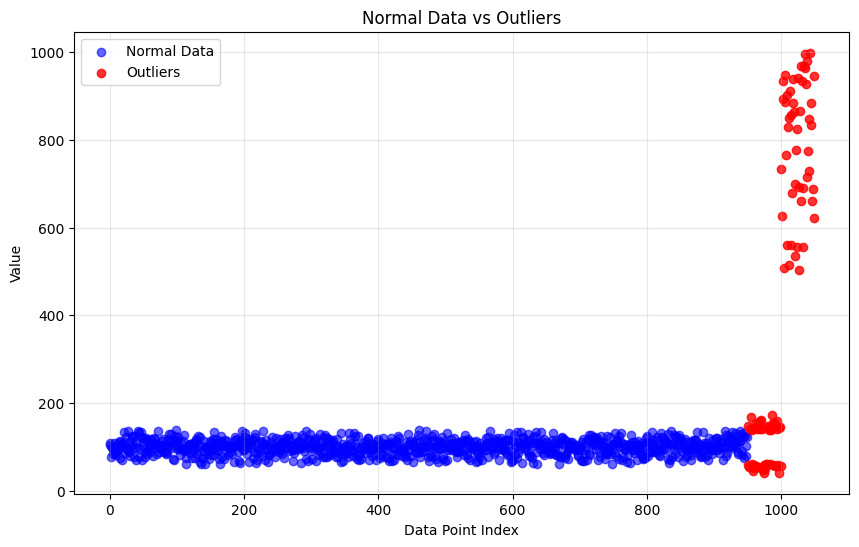

In [16]:
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
import numpy as np
import pandas as pd

# Generate normal data
normal_data = np.random.normal(100, 20, 1000)

# Basic outlier detection
outlier_detector = IForest(
    contamination=0.05,      # 5% outliers
    random_state=42          
)

outlier_labels = outlier_detector.fit_predict(normal_data.reshape(-1, 1))

# Add artificial outliers  
outlier_values = np.random.uniform(500, 1000, 50)
all_data = np.concatenate([normal_data, outlier_values])
all_labels = np.concatenate([outlier_labels, np.ones(50)])

# Create DataFrame and display
df = pd.DataFrame({
    'values': all_data, 
    'is_outlier': all_labels
})


print("Data with Outliers:")
print(df.head(20))
print(f"\nTotal data points: {len(df)}")
print(f"Normal points: {sum(df['is_outlier'] == 0)}")  
print(f"Outlier points: {sum(df['is_outlier'] == 1)}")

# Simple visualization
plt.figure(figsize=(10, 6))
normal_points = df[df['is_outlier'] == 0]['values']
outlier_points = df[df['is_outlier'] == 1]['values']

plt.scatter(range(len(normal_points)), normal_points, 
           c='blue', alpha=0.6, label='Normal Data')
plt.scatter(range(len(normal_points), len(df)), outlier_points,
           c='red', alpha=0.8, label='Outliers')
           
plt.title('Normal Data vs Outliers')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

